# 7. Population charts

Population charts are a new addition to Multiplex that help you display data visually with one point per population item.
These kind of visualizations can be helpful in many scenarios, such as displaying the population of countries to breaking down a population into different groups.

As usual, Multiplex gives you the possibility of customizing these visualizations to your heart's content, allowing you tell different stories with the same type of visualization.
We'll explore these options in this notebook.
We will go through some examples that show you how you can use population charts in your projects.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

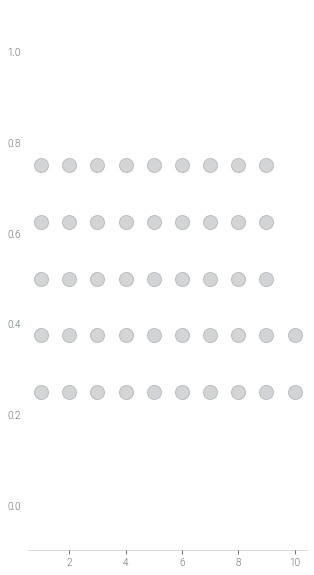

In [4]:
import matplotlib.pyplot as plt
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

style = { 's': 200, 'alpha': 0.2, 'color': 'C0' }

viz = drawable.Drawable(plt.figure(figsize=(5, 10)))
viz.draw_population(47, 5, height=0.5, **style)
viz.show()

Original size (1):  999.9999999999984
Original size (2):  1999.9999999999889
Original size (3):  499.9999999999972
Reduce by ratio 0.0624999999999999


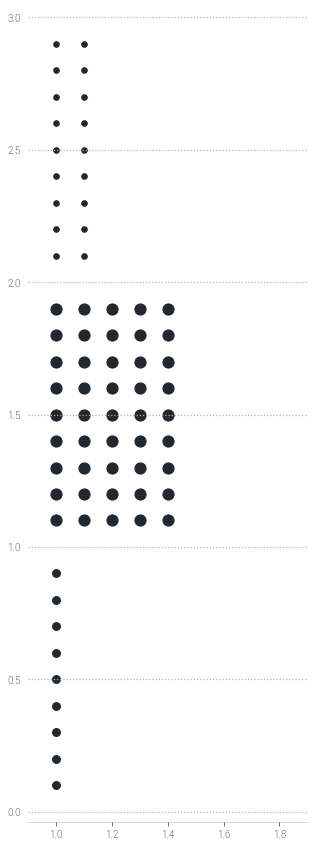

In [34]:
from matplotlib.transforms import Bbox
from multiplex import drawable, util
drawable = importlib.reload(drawable)
util = importlib.reload(util)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# set up the plot
figure = plt.figure(figsize=(5, 15))
viz = drawable.Drawable(figure)

def get_s(bb, viz):
    """
    Get the original size of the scatter point.
    """
    
    cx, cy = (bb.x0 + bb.x1) / 2, (bb.y0 + bb.y1) / 2
    bb_px = util.to_px(viz.axes, bb, viz.axes.transData)
    sx, sy = (bb_px.x1 - bb_px.x0) ** 2, (bb_px.y1 - bb_px.y0) ** 2

#     ratio = util.get_aspect(viz.axes)
#     print('Aspect ratio: ', ratio)
    
#     return min(sx, sy)
    return sy

s = 1000

# draw the first population
points = [ viz.scatter(1, y / 10, s=s, color='C0') for y in range(1, 10, 1) ]
bb_og = util.get_scatter_bb(viz.figure, viz.axes, points[0], viz.axes.transData)
print('Original size (1): ', get_s(bb_og, viz))

# draw a second population, this time with a longer x-tail
points_2 = [ viz.scatter(1 + x / 10, 1 + y / 10, s=s*2, color='C0')
                for y in range(1, 10, 1)
                for x in range(0, 5, 1) ]
bb_og_2 = util.get_scatter_bb(viz.figure, viz.axes, points_2[-1], viz.axes.transData)
print('Original size (2): ', get_s(bb_og_2, viz))

# draw a third population
points_3 = [ viz.scatter(1 + x / 10, 2 + y / 10, s=s*0.5, color='C0')
                for y in range(1, 10, 1)
                for x in range(0, 2, 1) ]
bb_og_3 = util.get_scatter_bb(viz.figure, viz.axes, points_3[-1], viz.axes.transData)
print('Original size (3): ', get_s(bb_og_3, viz))

# create a new bounding box and get the size of a scatter point that fits inside of it
# the y dimensions will be the same when the plot grows vertically
# the x dimensions will be the same when the plot grows horizontally
s_og = get_s(bb_og, viz)
ratio = s_og / s
print('Reduce by ratio', ratio)
for point in points:
    point.set_sizes([ point.get_sizes()[0] * ratio ])
    
for point in points_2:
    point.set_sizes([ point.get_sizes()[0] * ratio ]) # set using the same ratio as the first population so all populations have the same size!

for point in points_3:
    point.set_sizes([ point.get_sizes()[0] * ratio ]) # set using the same ratio as the first population so all populations have the same size!

bb = util.get_scatter_bb(viz.figure, viz.axes, points[0], viz.axes.transData)
viz.set_xlim(0.9, 1.9)
viz.show()